<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/Beta(B)Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Beta**: It is the measure of a stock's volatility with respect of the overall market

S&P 500(Beta) = 1

High Beta stocks are riskier but provides higher return potential

Low Beta stocks are riskless but yields lower returns

Beta(B) = Covariance/Variance

Beta(B) > 1, stock is more volatile wrt market and provides higher returns

Beta(B) > 1, stock is less volatile wrt market and yields lower returns

In [ ]:
pip install yfinance 

In [ ]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
from sklearn.linear_model import LinearRegression
import yfinance as yf


In [ ]:
ticks = ["AAPL", "MSFT", "TWTR", "IBM", "SPY"]
dt = yf.download(ticks, start="2016-01-01", end="2022-01-05", rounding= True)["Adj Close"]


[*********************100%***********************]  5 of 5 completed


In [ ]:
dt.tail(11)

,AAPL,IBM,MSFT,SPY,TWTR
Date,,,,,
2021-12-20,169.75,127.06,319.91,454.98,42.98
2021-12-21,172.99,128.97,327.29,463.06,44.36
2021-12-22,175.64,129.75,333.20,467.69,43.90
2021-12-23,176.28,130.63,334.69,470.60,44.16
2021-12-27,180.33,131.62,342.45,477.26,44.33
2021-12-28,179.29,132.63,341.25,476.87,43.43
2021-12-29,179.38,133.35,341.95,477.48,42.76
2021-12-30,178.20,133.91,339.32,476.16,44.46
2021-12-31,177.57,133.66,336.32,474.96,43.22


In [ ]:
log_retuns = np.log(dt/dt.shift())

In [ ]:
log_retuns.tail(11)

,AAPL,IBM,MSFT,SPY,TWTR
Date,,,,,
2021-12-20,-0.008155,-0.002672,-0.012086,-0.010690,-0.002092
2021-12-21,0.018907,0.014920,0.022807,0.017603,0.031603
2021-12-22,0.015203,0.006030,0.017896,0.009949,-0.010424
2021-12-23,0.003637,0.006759,0.004462,0.006203,0.005905
2021-12-27,0.022715,0.007550,0.022921,0.014053,0.003842
2021-12-28,-0.005784,0.007644,-0.003510,-0.000817,-0.020511
2021-12-29,0.000502,0.005414,0.002049,0.001278,-0.015547
2021-12-30,-0.006600,0.004191,-0.007721,-0.002768,0.038987
2021-12-31,-0.003542,-0.001869,-0.008881,-0.002523,-0.028287


In [ ]:
cov = log_retuns.cov()

In [ ]:
cov.tail(11)

,AAPL,IBM,MSFT,SPY,TWTR
AAPL,0.000343,0.000125,0.000222,0.000157,0.000233
IBM,0.000125,0.000258,0.000133,0.000125,0.000131
MSFT,0.000222,0.000133,0.000284,0.000157,0.000232
SPY,0.000157,0.000125,0.000157,0.000130,0.000167
TWTR,0.000233,0.000131,0.000232,0.000167,0.001099


In [ ]:
var = log_retuns.var()

In [ ]:
var.tail(11)

AAPL    0.000343
IBM     0.000258
MSFT    0.000284
SPY     0.000130
TWTR    0.001099
dtype: float64

In [ ]:
Beta = cov/var

In [ ]:
Beta

,AAPL,IBM,MSFT,SPY,TWTR
AAPL,1.000000,0.482417,0.782633,1.211121,0.212236
IBM,0.362800,1.000000,0.466469,0.959191,0.119597
MSFT,0.647705,0.513330,1.000000,1.210602,0.210776
SPY,0.458272,0.482610,0.553501,1.000000,0.152112
TWTR,0.679524,0.509168,0.815432,1.287099,1.000000


In [ ]:
X = log_retuns['SPY'].iloc[1:].to_numpy().reshape(-1,1)
Y = log_retuns['AAPL'].iloc[1:].to_numpy().reshape(-1,1)


LinearRegression = LinearRegression()
LinearRegression.fit(X,Y)

LinearRegression.coef_[0, 0]


TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

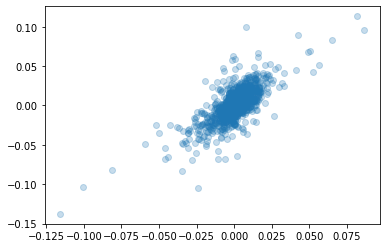

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X,Y, alpha=0.25)